In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [2]:
df=pd.read_csv('heart_attack_germany.csv')

In [3]:
df.shape

(275644, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275644 entries, 0 to 275643
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   State                     275644 non-null  object 
 1   Age_Group                 275644 non-null  object 
 2   Heart_Attack_Incidence    275644 non-null  int64  
 3   Year                      275644 non-null  int64  
 4   Gender                    275644 non-null  object 
 5   BMI                       275644 non-null  float64
 6   Smoking_Status            275644 non-null  object 
 7   Alcohol_Consumption       275644 non-null  float64
 8   Physical_Activity_Level   275644 non-null  object 
 9   Diet_Quality              275644 non-null  object 
 10  Family_History            275644 non-null  int64  
 11  Hypertension              275644 non-null  int64  
 12  Cholesterol_Level         275644 non-null  float64
 13  Diabetes                  275644 non-null  i

In [5]:
df.describe()

,Heart_Attack_Incidence,Year,BMI,Alcohol_Consumption,Family_History,Hypertension,Cholesterol_Level,Diabetes,Air_Pollution_Index,Region_Heart_Attack_Rate
count,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000,275644.000000
mean,0.150070,2018.997319,24.992669,4.985734,0.300540,0.400564,130.034229,0.199525,27.486225,10.489019
std,0.357141,2.582667,4.996535,5.001789,0.458494,0.490014,30.009242,0.399644,13.001527,5.483277
min,0.000000,2015.000000,1.400000,0.000000,0.000000,0.000000,-7.900000,0.000000,5.000000,1.000000
25%,0.000000,2017.000000,21.600000,1.400000,0.000000,0.000000,109.800000,0.000000,16.220000,5.750000
50%,0.000000,2019.000000,25.000000,3.500000,0.000000,0.000000,130.100000,0.000000,27.430000,10.490000
75%,0.000000,2021.000000,28.400000,6.900000,1.000000,1.000000,150.300000,0.000000,38.780000,15.240000
max,1.000000,2023.000000,47.900000,70.000000,1.000000,1.000000,272.400000,1.000000,50.000000,20.000000


In [6]:
print(df.duplicated().sum())

0


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().sum()

State                       0
Age_Group                   0
Heart_Attack_Incidence      0
Year                        0
Gender                      0
BMI                         0
Smoking_Status              0
Alcohol_Consumption         0
Physical_Activity_Level     0
Diet_Quality                0
Family_History              0
Hypertension                0
Cholesterol_Level           0
Diabetes                    0
Urban_Rural                 0
Socioeconomic_Status        0
Air_Pollution_Index         0
Stress_Level                0
Healthcare_Access           0
Education_Level             0
Employment_Status           0
Region_Heart_Attack_Rate    0
dtype: int64

In [9]:
df.dropna(how='all',inplace=True)

In [10]:
df.drop(columns=['State','Year','Region_Heart_Attack_Rate'], inplace=True)

In [11]:
df.head()

,Age_Group,Heart_Attack_Incidence,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Quality,Family_History,Hypertension,Cholesterol_Level,Diabetes,Urban_Rural,Socioeconomic_Status,Air_Pollution_Index,Stress_Level,Healthcare_Access,Education_Level,Employment_Status
0,Youth,0,Other,25.6,Former Smoker,4.2,Moderate,Average,1,0,154.4,0,Rural,Low,31.58,Moderate,Moderate,Primary,Retired
1,Adult,0,Female,36.7,Smoker,2.4,Low,Poor,0,1,75.0,1,Rural,Low,46.22,High,Easy,Primary,Unemployed
2,Youth,1,Female,28.6,Smoker,29.5,High,Poor,0,0,121.9,0,Urban,Middle,15.69,High,Hard,Secondary,Student
3,Adult,0,Male,27.6,Non-Smoker,4.2,Moderate,Poor,0,1,152.3,0,Urban,Low,26.50,High,Hard,Tertiary,Student
4,Adult,0,Female,15.2,Smoker,4.3,Moderate,Good,0,1,130.3,0,Urban,High,11.21,High,Moderate,Tertiary,Employed


In [12]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

In [13]:
categerical_cols=df.select_dtypes(include='object').columns
for col in categerical_cols:
    df[col]=LabelEncoder().fit_transform(df[col])

In [14]:
df.head()

,Age_Group,Heart_Attack_Incidence,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Quality,Family_History,Hypertension,Cholesterol_Level,Diabetes,Urban_Rural,Socioeconomic_Status,Air_Pollution_Index,Stress_Level,Healthcare_Access,Education_Level,Employment_Status
0,1,0,2,25.6,0,4.2,2,0,1,0,154.4,0,0,1,31.58,2,2,0,1
1,0,0,0,36.7,2,2.4,1,2,0,1,75.0,1,0,1,46.22,0,0,0,3
2,1,1,0,28.6,2,29.5,0,2,0,0,121.9,0,1,2,15.69,0,1,1,2
3,0,0,1,27.6,1,4.2,2,2,0,1,152.3,0,1,1,26.50,0,1,2,2
4,0,0,0,15.2,2,4.3,2,1,0,1,130.3,0,1,0,11.21,0,2,2,0


In [16]:
columns_to_scale=['BMI','Alcohol_Consumption','Physical_Activity_Level','Cholesterol_Level','Air_Pollution_Index']
#scaler = MinMaxScalar()
scaler=StandardScaler()
df[columns_to_scale]=scaler.fit_transform(df[columns_to_scale])

In [17]:
df.head()

,Age_Group,Heart_Attack_Incidence,Gender,BMI,Smoking_Status,Alcohol_Consumption,Physical_Activity_Level,Diet_Quality,Family_History,Hypertension,Cholesterol_Level,Diabetes,Urban_Rural,Socioeconomic_Status,Air_Pollution_Index,Stress_Level,Healthcare_Access,Education_Level,Employment_Status
0,1,0,2,0.121551,0,-0.157091,1.223503,0,1,0,0.811944,0,0,1,0.314869,2,2,0,1
1,0,0,0,2.343094,2,-0.516963,-0.001676,2,0,1,-1.833913,1,0,1,1.440893,0,0,0,3
2,1,1,0,0.721968,2,4.901108,-1.226855,2,0,0,-0.271058,0,1,2,-0.907297,0,1,1,2
3,0,0,1,0.521829,1,-0.157091,1.223503,2,0,1,0.741965,0,1,1,-0.075855,0,1,2,2
4,0,0,0,-1.959896,2,-0.137098,1.223503,1,0,1,0.008856,0,1,0,-1.251873,0,2,2,0


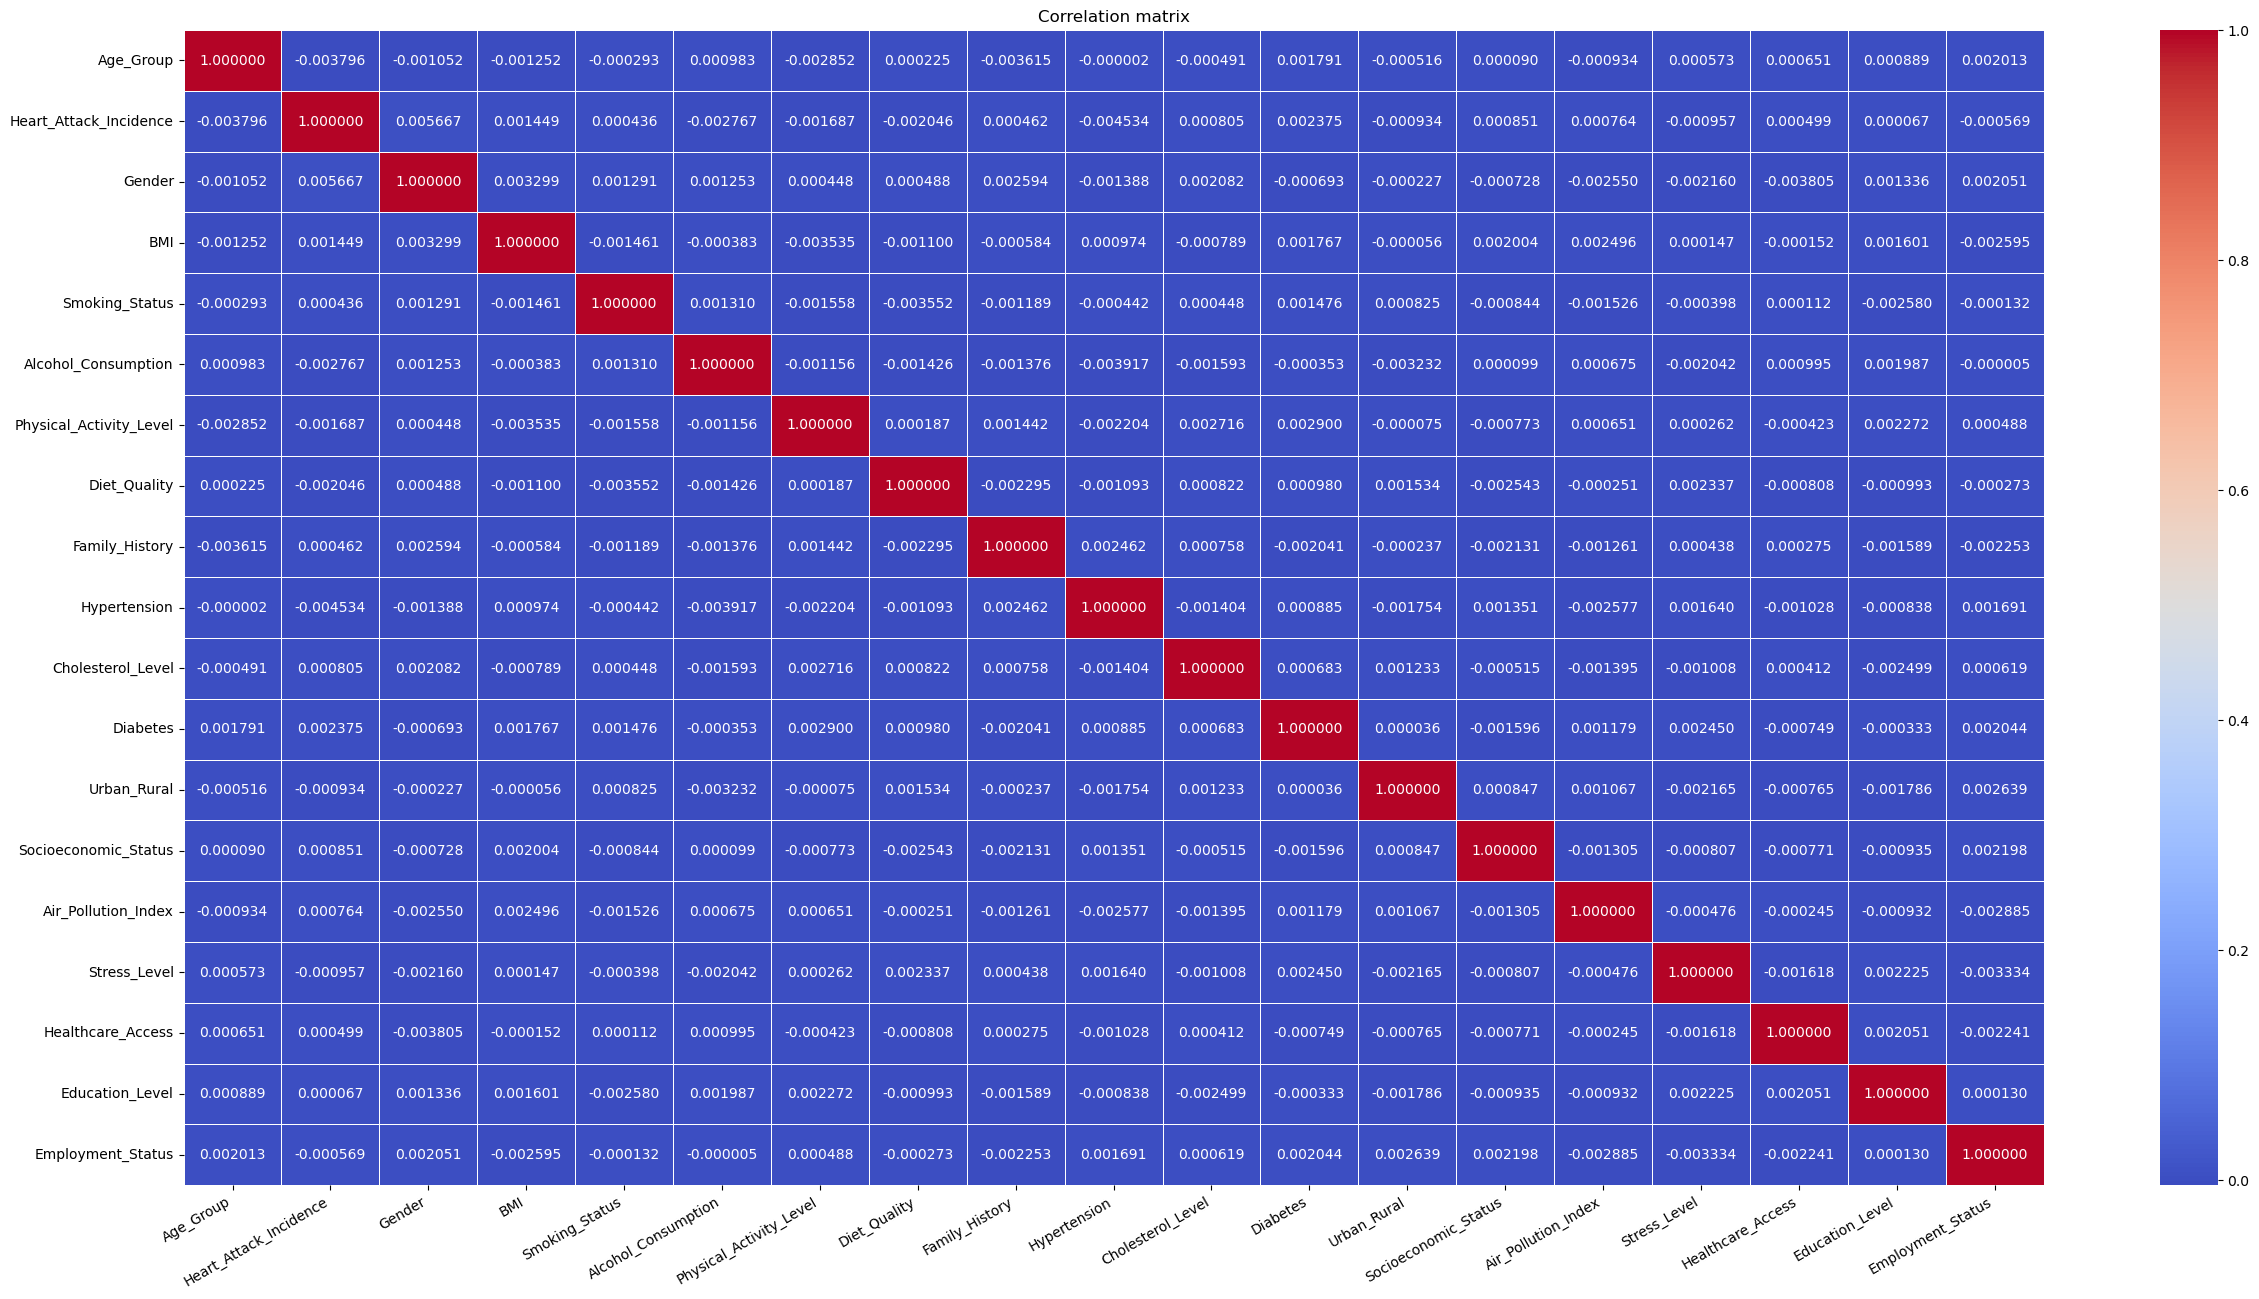

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(30,15)) #30 width 20 height
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='2f', linewidth=.5) 
plt.title('Correlation matrix')
plt.xticks(rotation=30,ha='right') 
plt.show()

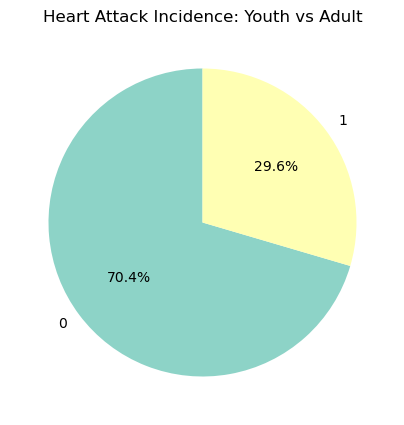

In [22]:
age_counts = df.groupby("Age_Group")["Heart_Attack_Incidence"].sum()
plt.figure(figsize=(5,5))
plt.pie(age_counts,labels=age_counts.index,autopct='%1.1f%%',startangle=90,colors=plt.cm.Set3.colors)
plt.title("Heart Attack Incidence: Youth vs Adult")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3964\2605388094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot( x=df['Age_Group'],y=df['Heart_Attack_Incidence'],palette="Set2")


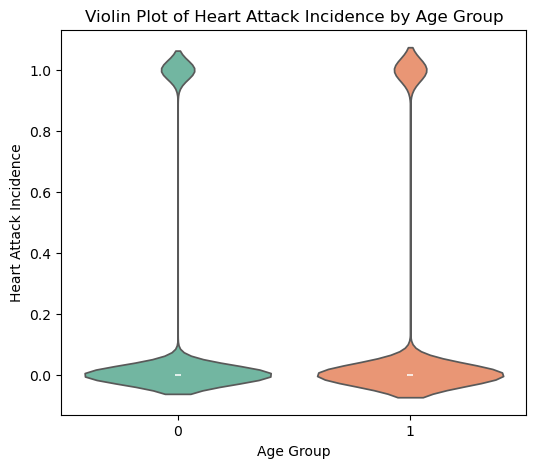

In [32]:
plt.figure(figsize=(6,5))
sns.violinplot( x=df['Age_Group'],y=df['Heart_Attack_Incidence'],palette="Set2")
plt.title("Violin Plot of Heart Attack Incidence by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Heart Attack Incidence")
plt.show()

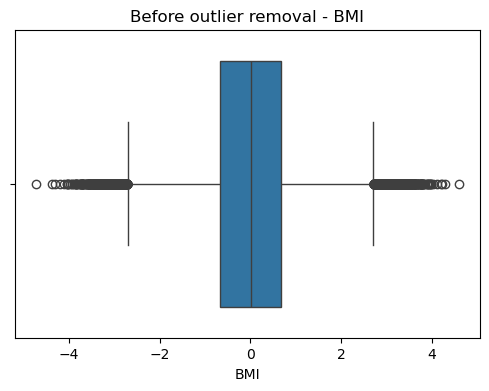

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['BMI'])
plt.title('Before outlier removal - BMI')
plt.show()

In [20]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR=Q3 - Q1
lower=Q1 - 1.5*IQR
upper=Q3 + 1.5*IQR
df=df[(df['BMI']>=lower) & (df['BMI']<=upper) ]

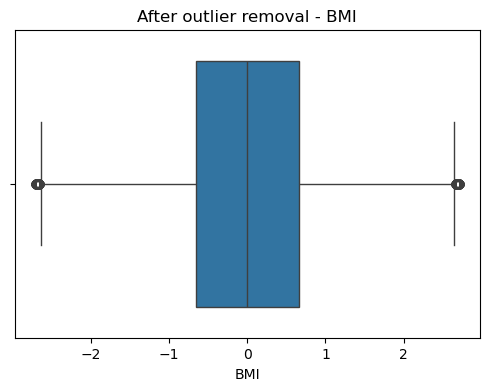

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['BMI'])
plt.title('After outlier removal - BMI')
plt.show()

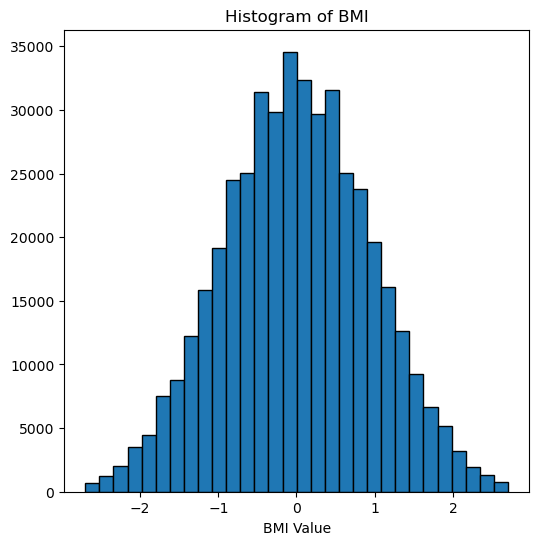

In [51]:
plt.figure(figsize=(6,6))
plt.hist(df['BMI'], bins=30, edgecolor='black')
plt.title("Histogram of BMI")
plt.xlabel("BMI Value")
plt.ylabel("")
plt.show()

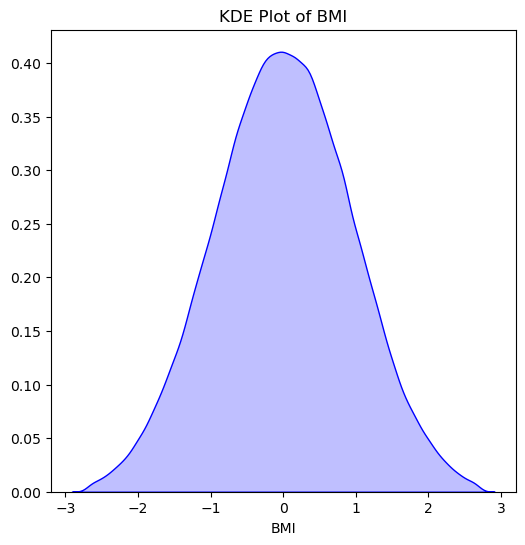

In [52]:
plt.figure(figsize=(6,6))
sns.kdeplot(df['BMI'], fill=True, color="blue")
plt.title("KDE Plot of BMI")
plt.xlabel("BMI")
plt.ylabel("")
plt.show()

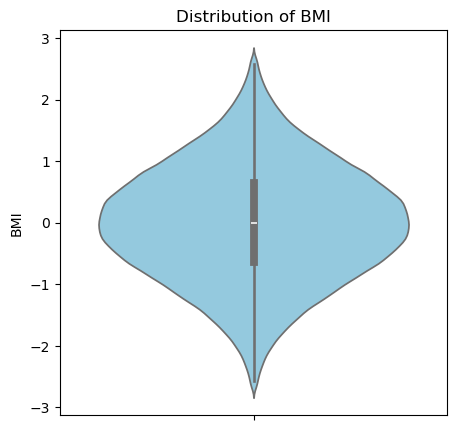

In [63]:
plt.figure(figsize=(5,5))
sns.violinplot(y=df["BMI"], color="skyblue")
plt.title("Distribution of BMI")
plt.show()

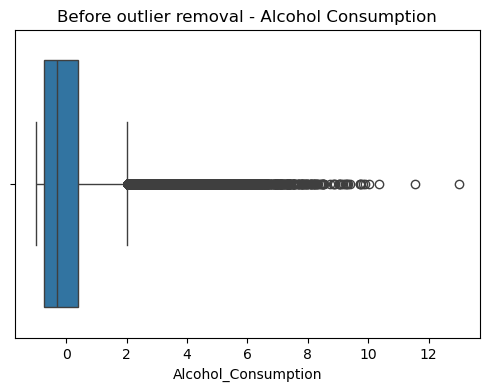

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Alcohol_Consumption'])
plt.title('Before outlier removal - Alcohol Consumption')
plt.show()

In [25]:
Q1 = df['Alcohol_Consumption'].quantile(0.25)
Q3 = df['Alcohol_Consumption'].quantile(0.75)
IQR=Q3 - Q1
lower=Q1 - 1.5*IQR
upper=Q3 + 1.5*IQR
df=df[(df['Alcohol_Consumption']>=lower) & (df['Alcohol_Consumption']<=upper) ]

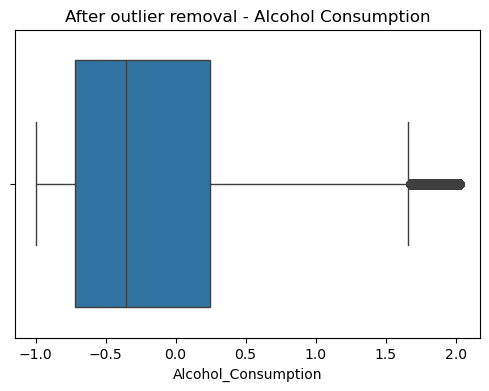

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Alcohol_Consumption'])
plt.title('After outlier removal - Alcohol Consumption')
plt.show()

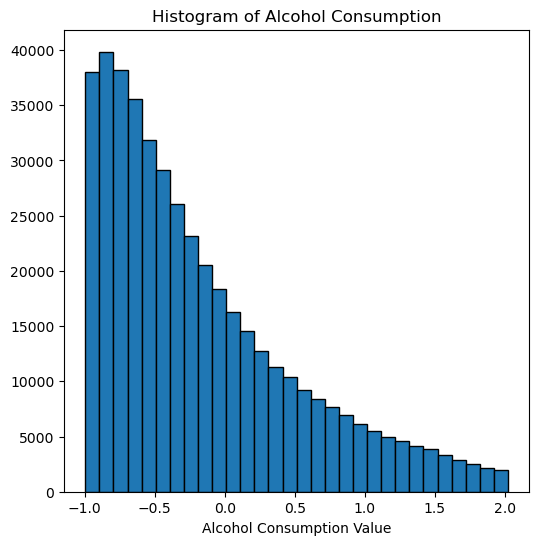

In [53]:
plt.figure(figsize=(6,6))
plt.hist(df['Alcohol_Consumption'], bins=30, edgecolor='black')
plt.title("Histogram of Alcohol Consumption")
plt.xlabel("Alcohol Consumption Value")
plt.ylabel("")
plt.show()

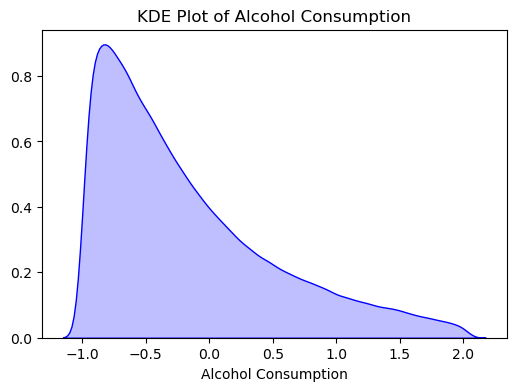

In [54]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['Alcohol_Consumption'], fill=True, color="blue")
plt.title("KDE Plot of Alcohol Consumption")
plt.xlabel("Alcohol Consumption")
plt.ylabel("")
plt.show()

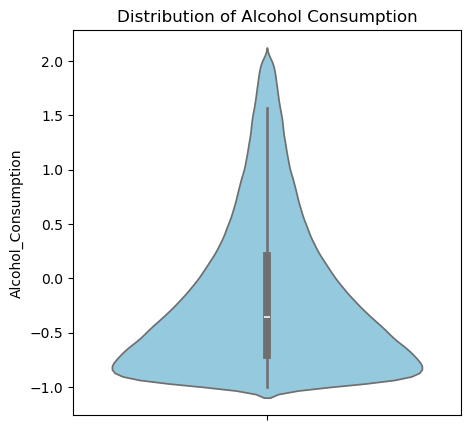

In [64]:
plt.figure(figsize=(5,5))
sns.violinplot(y=df["Alcohol_Consumption"], color="skyblue")
plt.title("Distribution of Alcohol Consumption")
plt.show()

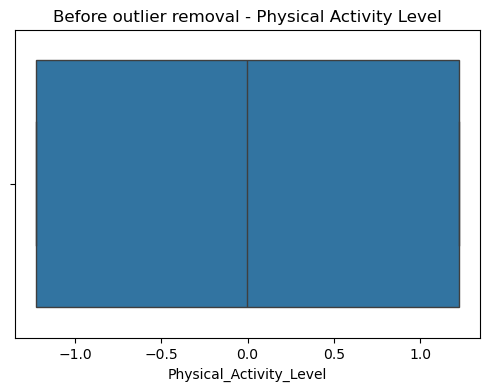

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Physical_Activity_Level'])
plt.title('Before outlier removal - Physical Activity Level')
plt.show()

In [32]:
Q1 = df['Physical_Activity_Level'].quantile(0.25)
Q3 = df['Physical_Activity_Level'].quantile(0.75)
IQR=Q3 - Q1
lower=Q1 - 1.5*IQR
upper=Q3 + 1.5*IQR
df=df[(df['Physical_Activity_Level']>=lower) & (df['Physical_Activity_Level']<=upper) ]

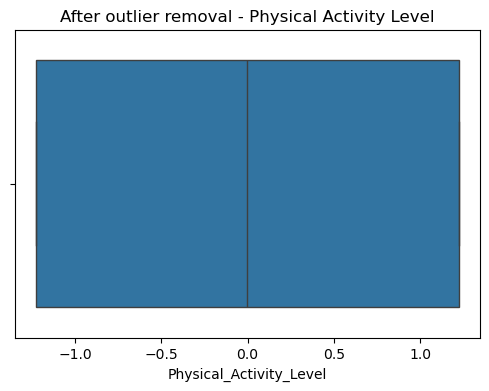

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Physical_Activity_Level'])
plt.title('After outlier removal - Physical Activity Level')
plt.show()

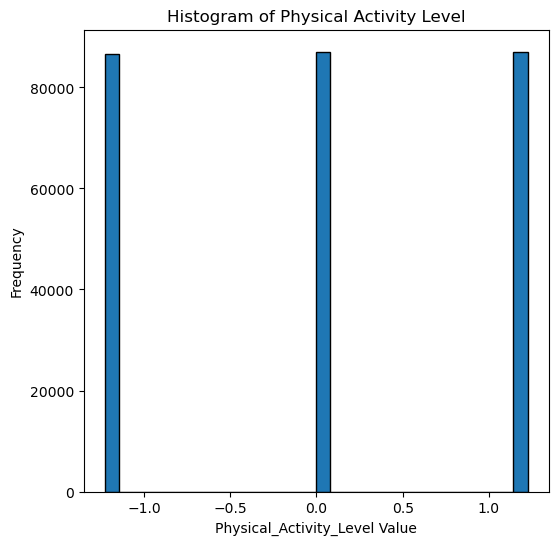

In [34]:
plt.figure(figsize=(6,6))
plt.hist(df['Physical_Activity_Level'], bins=30, edgecolor='black')
plt.title("Histogram of Physical Activity Level")
plt.xlabel("Physical_Activity_Level Value")
plt.ylabel("Frequency")
plt.show()

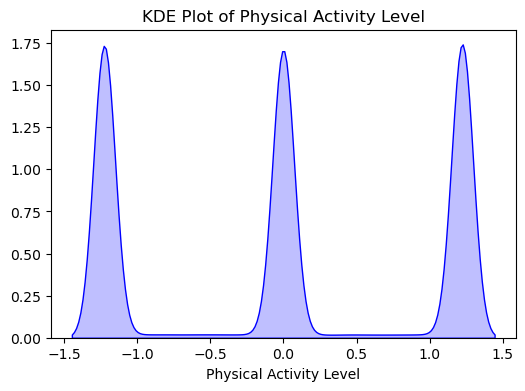

In [55]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['Physical_Activity_Level'], fill=True, color="blue")
plt.title("KDE Plot of Physical Activity Level")
plt.xlabel("Physical Activity Level")
plt.ylabel("")
plt.show()

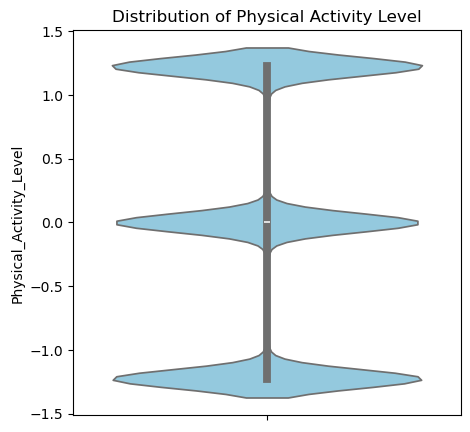

In [65]:
plt.figure(figsize=(5,5))
sns.violinplot(y=df["Physical_Activity_Level"], color="skyblue")
plt.title("Distribution of Physical Activity Level")
plt.show()

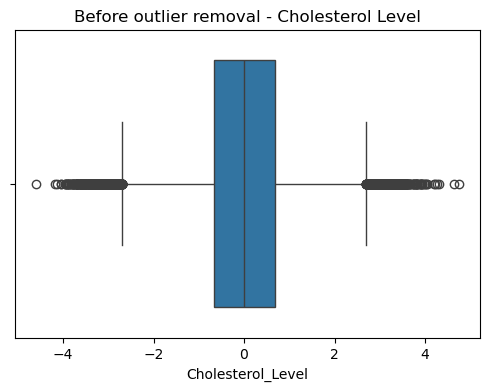

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Cholesterol_Level'])
plt.title('Before outlier removal - Cholesterol Level')
plt.show()

In [37]:
Q1 = df['Cholesterol_Level'].quantile(0.25)
Q3 = df['Cholesterol_Level'].quantile(0.75)
IQR=Q3 - Q1
lower=Q1 - 1.5*IQR
upper=Q3 + 1.5*IQR
df=df[(df['Cholesterol_Level']>=lower) & (df['Cholesterol_Level']<=upper) ]

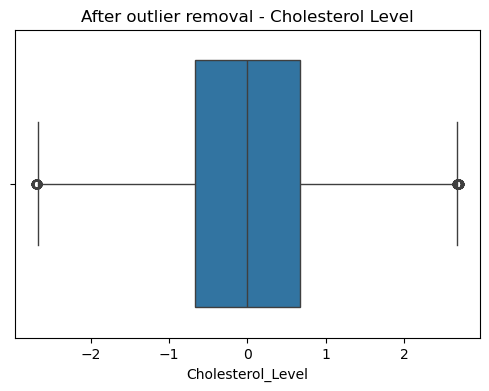

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Cholesterol_Level'])
plt.title('After outlier removal - Cholesterol Level')
plt.show()

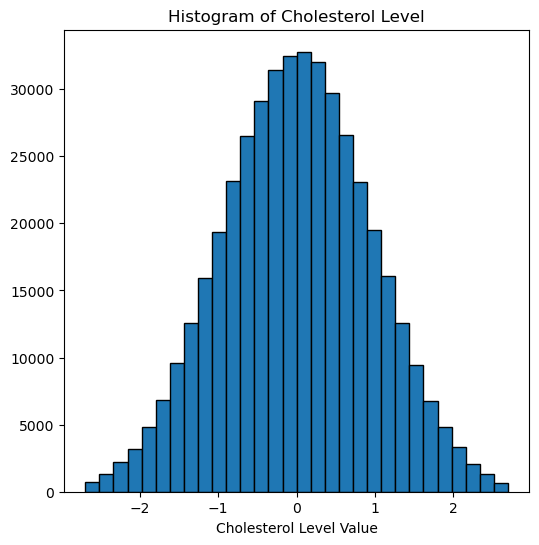

In [56]:
plt.figure(figsize=(6,6))
plt.hist(df['Cholesterol_Level'], bins=30, edgecolor='black')
plt.title("Histogram of Cholesterol Level")
plt.xlabel("Cholesterol Level Value")
plt.ylabel("")
plt.show()

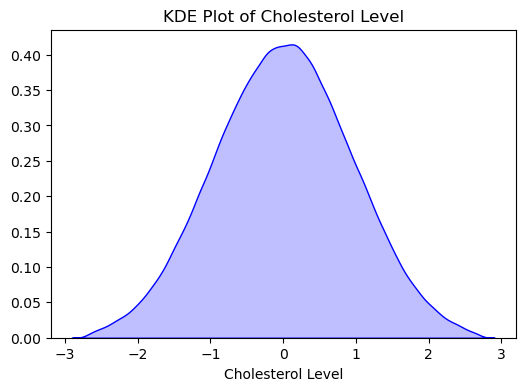

In [66]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['Cholesterol_Level'], fill=True, color="blue")
plt.title("KDE Plot of Cholesterol Level")
plt.xlabel("Cholesterol Level")
plt.ylabel("")
plt.show()

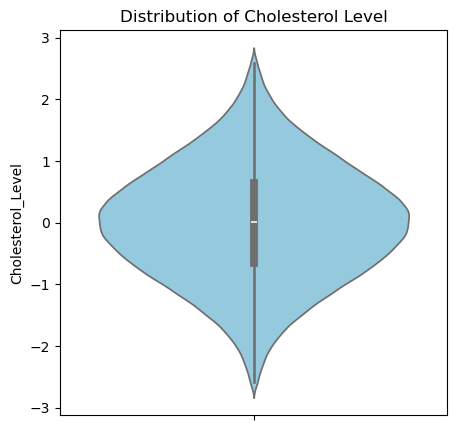

In [67]:
plt.figure(figsize=(5,5))
sns.violinplot(y=df["Cholesterol_Level"], color="skyblue")
plt.title("Distribution of Cholesterol Level")
plt.show()

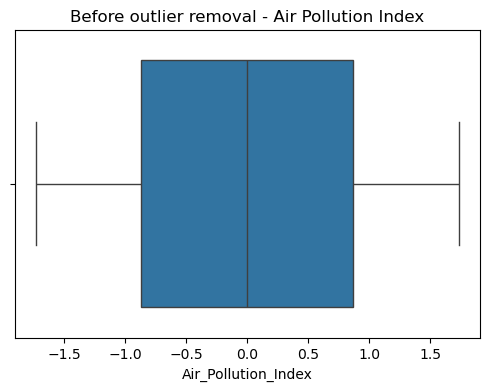

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Air_Pollution_Index'])
plt.title('Before outlier removal - Air Pollution Index')
plt.show()

In [42]:
Q1 = df['Air_Pollution_Index'].quantile(0.25)
Q3 = df['Air_Pollution_Index'].quantile(0.75)
IQR=Q3 - Q1
lower=Q1 - 1.5*IQR
upper=Q3 + 1.5*IQR
df=df[(df['Air_Pollution_Index']>=lower) & (df['Air_Pollution_Index']<=upper) ]

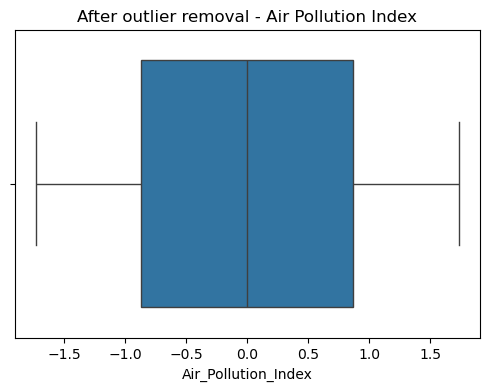

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Air_Pollution_Index'])
plt.title('After outlier removal - Air Pollution Index')
plt.show()

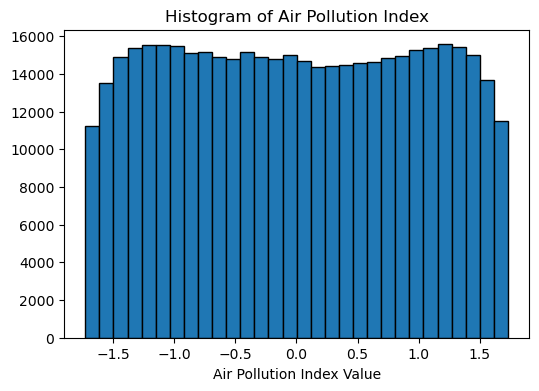

In [58]:
plt.figure(figsize=(6,4))
plt.hist(df['Air_Pollution_Index'], bins=30, edgecolor='black')
plt.title("Histogram of Air Pollution Index")
plt.xlabel("Air Pollution Index Value")
plt.ylabel("")
plt.show()

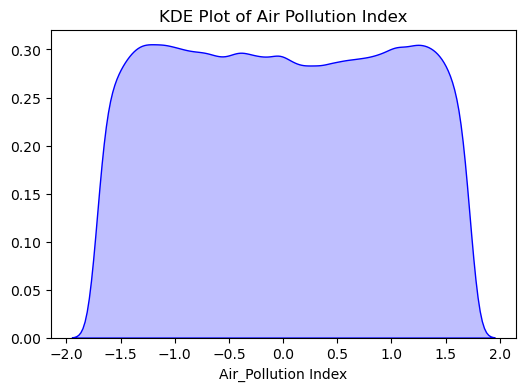

In [59]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['Air_Pollution_Index'], fill=True, color="blue")
plt.title("KDE Plot of Air Pollution Index")
plt.xlabel("Air_Pollution Index")
plt.ylabel("")
plt.show()

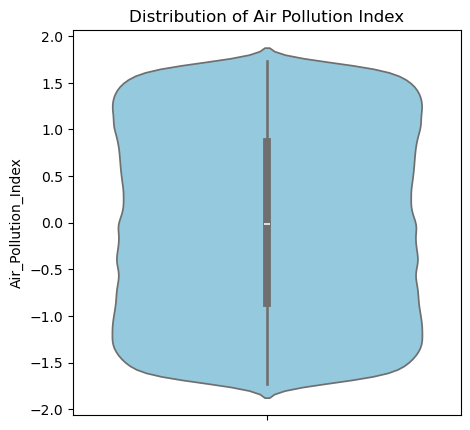

In [68]:
plt.figure(figsize=(5,5))
sns.violinplot(y=df["Air_Pollution_Index"], color="skyblue")
plt.title("Distribution of Air Pollution Index")
plt.show()

In [46]:
print(df['Heart_Attack_Incidence'].value_counts())

Heart_Attack_Incidence
0    220173
1     38836
Name: count, dtype: int64


In [47]:
X = df.drop(columns='Heart_Attack_Incidence')
y =df['Heart_Attack_Incidence']

In [48]:
#balance= SMOTE(random_state=42)
#balance=TomekLinks()
balance = SMOTETomek(random_state=42)
X_resampled, y_resampled = balance.fit_resample(X,y)
print(f'Resampled Size: {y_resampled.value_counts()}')

Resampled Size: Heart_Attack_Incidence
0    220038
1    220038
Name: count, dtype: int64


In [49]:
X = X_resampled
y = y_resampled

In [50]:
df=pd.concat([X,y],axis=1)
df.to_csv('heart_attack_germany_updated.csv',index=False)